In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
verra_df = pd.read_csv('data/verra.csv')
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country/Area,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details,is Toucan
0,2024-02-20,NaN,2022-12-01,2022-12-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,2517,2517,16319-755958735-755961251-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-20,NaN,2023-01-01,2023-05-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,8360,8360,16320-755961252-755969611-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-19,NaN,2013-01-01,2013-12-31,1122,April Salumei REDD Project,Papua New Guinea,Agriculture Forestry and Other Land Use,VM0007; VM0010,129972,10000,16301-755074262-755084261-VCS-VCU-352-VER-PG-1...,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-19,NaN,2022-01-01,2022-12-31,1812,VTRM Renewable Energy,Brazil,Energy industries (renewable/non-renewable sou...,ACM0002,409442,409442,16302-755084262-755493703-VCS-VCU-1491-VER-BR-...,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-19,NaN,2023-01-01,2023-08-31,1856,Bundled Wind Power Project by Sembcorp Green I...,India,Energy industries (renewable/non-renewable sou...,ACM0002,145996,145996,16303-755493704-755639699-VCS-VCU-997-VER-IN-1...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
verra_df = verra_df.sort_values(by='Vintage End')

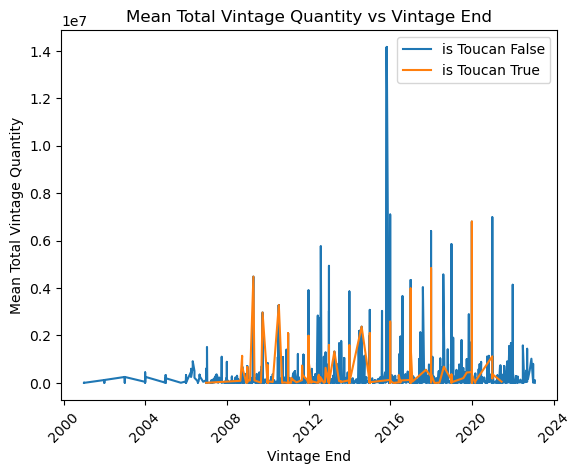

In [6]:
import matplotlib.pyplot as plt

# Convert 'Vintage End' to datetime
verra_df['Vintage End'] = pd.to_datetime(verra_df['Vintage End'])

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]


# Plot 'Vintage End' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Vintage End'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')

# Plot 'Vintage End' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Vintage End'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')


# Set labels and title
plt.xlabel('Vintage End')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Vintage End')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()




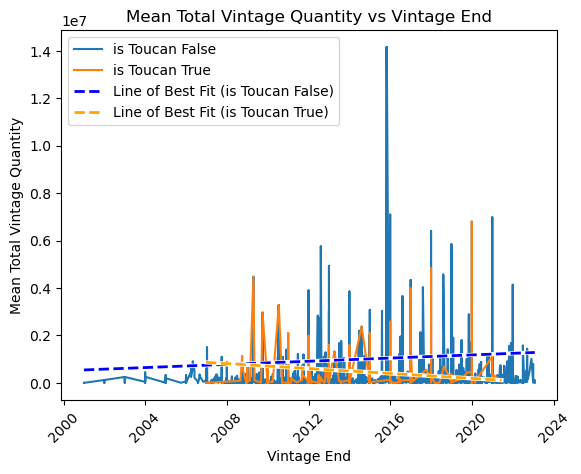

In [11]:
from sklearn.linear_model import LinearRegression

# Convert 'Vintage End' to datetime
verra_df['Vintage End'] = pd.to_datetime(verra_df['Vintage End'])

# Group by 'Vintage End' and 'is Toucan', and calculate the mean 'Total Vintage Quantity'

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]

# Linear regression for True 'is Toucan'
true_x = is_toucan_true['Vintage End'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
true_y = is_toucan_true['Total Vintage Quantity'].values.reshape(-1, 1)
true_model = LinearRegression().fit(true_x, true_y)
true_y_pred = true_model.predict(true_x)

# Linear regression for False 'is Toucan'
false_x = is_toucan_false['Vintage End'].values.astype('datetime64[ns]').astype(np.int64).reshape(-1, 1)
false_y = is_toucan_false['Total Vintage Quantity'].values.reshape(-1, 1)
false_model = LinearRegression().fit(false_x, false_y)
false_y_pred = false_model.predict(false_x)

# Plot 'Vintage End' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Vintage End'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')

# Plot 'Vintage End' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Vintage End'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')

# Plot lines of best fit with white outline
plt.plot(is_toucan_false['Vintage End'], false_y_pred, color='white', linestyle='-', linewidth=3)
plt.plot(is_toucan_false['Vintage End'], false_y_pred, color='blue', linestyle='--', linewidth=2, label='Line of Best Fit (is Toucan False)')

plt.plot(is_toucan_true['Vintage End'], true_y_pred, color='white', linestyle='-', linewidth=3)
plt.plot(is_toucan_true['Vintage End'], true_y_pred, color='orange', linestyle='--', linewidth=2, label='Line of Best Fit (is Toucan True)')

# Set labels and title
plt.xlabel('Vintage End')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Vintage End')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()
